In [1]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
import re
import plotly.express as px
from rndeda import edamissing, eda1d, eda2d

In [7]:
import numpy as np

In [8]:
df = pd.read_csv("../dataset/titanic/train.csv")



In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
def scale_range (input, min, max):
            input += -(np.min(input))
            input /= np.max(input) / (max - min)
            input += min
            return input

In [11]:
def scale_range2(input, min, max):
    input = input - np.min(input)
    input = input/ (np.max(input) * (max-min))
    input = input + min
    return input

In [31]:
age_hist = np.histogram(df["Age"].dropna(), bins=10)

In [32]:
age_hist

(array([ 54,  46, 177, 169, 118,  70,  45,  24,   9,   2]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]))

In [33]:
label1 = []
label2 = []
for index in range(len(age_hist[0])):
    edge_1 = age_hist[1][index]
    edge_2 = age_hist[1][index+1]
    label1.append("{:.2f}".format(edge_1)+"-" + "{:.2f}".format(edge_2))
    label2.append("{:.2f}".format((edge_1+edge_2)/2))
    

In [34]:
label1

['0.42-8.38',
 '8.38-16.34',
 '16.34-24.29',
 '24.29-32.25',
 '32.25-40.21',
 '40.21-48.17',
 '48.17-56.13',
 '56.13-64.08',
 '64.08-72.04',
 '72.04-80.00']

In [35]:
label2

['4.40',
 '12.36',
 '20.32',
 '28.27',
 '36.23',
 '44.19',
 '52.15',
 '60.11',
 '68.06',
 '76.02']

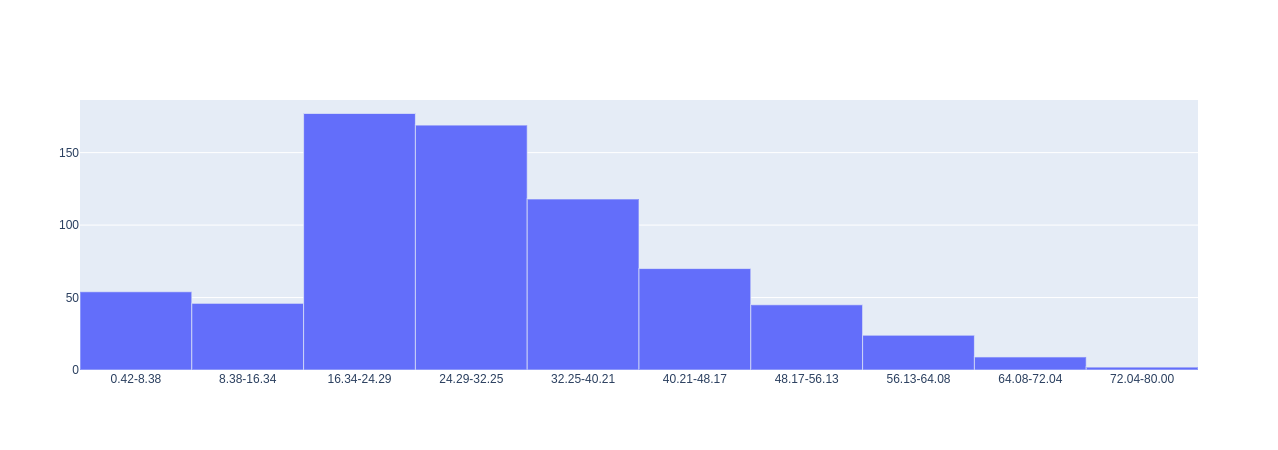

In [47]:
import plotly.graph_objects as go
animals=['giraffes', 'orangutans', 'monkeys']

fig = go.Figure([go.Bar(y=age_hist[0], x=label1, width=1.0)])
fig.show()

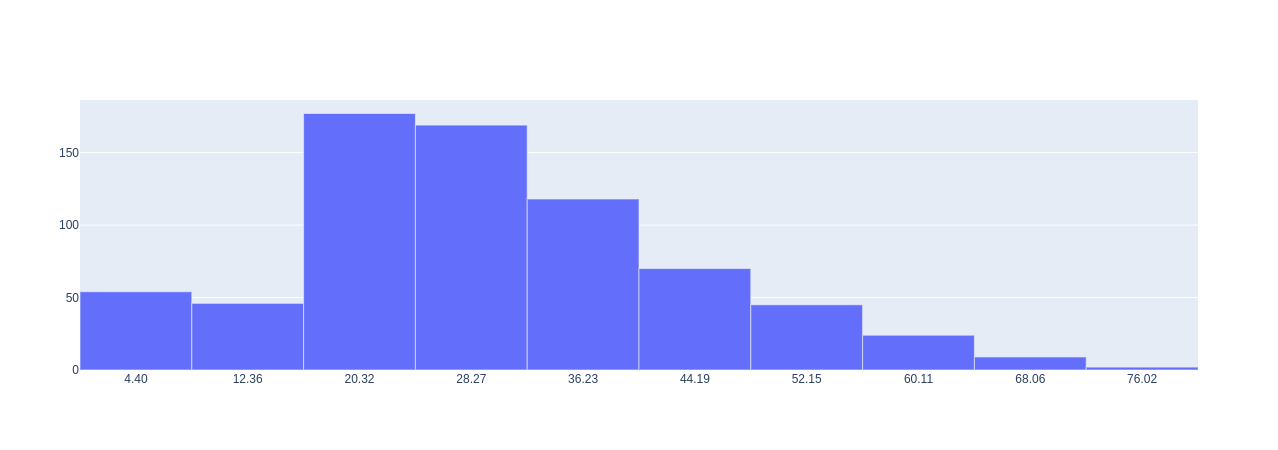

In [50]:
import plotly.graph_objects as go
animals=['giraffes', 'orangutans', 'monkeys']

fig = go.Figure([go.Bar(y=age_hist[0], x=label2, width=1.0)])
fig.update_xaxes(type="category")
fig.show()

In [15]:
?np.histogram

Signature:
np.histogram(
    a,
    bins=10,
    range=None,
    normed=None,
    weights=None,
    density=None,
)
Docstring:
Compute the histogram of a set of data.

Parameters
----------
a : array_like
    Input data. The histogram is computed over the flattened array.
bins : int or sequence of scalars or str, optional
    If `bins` is an int, it defines the number of equal-width
    bins in the given range (10, by default). If `bins` is a
    sequence, it defines a monotonically increasing array of bin edges,
    including the rightmost edge, allowing for non-uniform bin widths.

    .. versionadded:: 1.11.0

    If `bins` is a string, it defines the method used to calculate the
    optimal bin width, as defined by `histogram_bin_edges`.

range : (float, float), optional
    The lower and upper range of the bins.  If not provided, range
    is simply ``(a.min(), a.max())``.  Values outside the range are
    ignored. The first element of the range must be less than or
    equal to t